In [7]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression as LR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('cubic dataset.csv')
x = data.iloc[:,2:11].values
y = data.iloc[:,11].values
print(np.shape(data))
data.head(n=10)

(150, 12)


,index,compounds,rA (A),rB (A),rX (A),vA,vB,vX,eA,eB,eX,a (A)
0,1,BaAmO 3,1.35,0.85,1.4,2,4,-2,0.89,1.30,3.44,4.357
1,2,BaCeO 3,1.35,0.87,1.4,2,4,-2,0.89,1.12,3.44,4.397
2,3,BaFeO3,1.35,0.59,1.4,2,4,-2,0.89,1.83,3.44,3.994
3,4,BaHfO 3,1.35,0.71,1.4,2,4,-2,0.89,1.30,3.44,4.171
4,5,BaIrO3,1.35,0.63,1.4,2,4,-2,0.89,2.20,3.44,4.100
5,6,BaMoO3,1.35,0.65,1.4,2,4,-2,0.89,2.16,3.44,4.040
6,7,BaNbO3,1.35,0.68,1.4,2,4,-2,0.89,1.60,3.44,4.080
7,8,BaNpO3,1.35,0.87,1.4,2,4,-2,0.89,1.36,3.44,4.384
8,9,BaPaO3,1.35,0.90,1.4,2,4,-2,0.89,1.50,3.44,4.450
9,10,BaPbO3,1.35,0.78,1.4,2,4,-2,0.89,2.33,3.44,4.265


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
#Finding the maximum cross validation score with corresponding parameter values for two types of kernels. The kernel with
#maximum cross validation score is used.

rbf = np.zeros(10)
linear = np.zeros(10)
lr = np.zeros(10)
for l in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    cvs_svr_linear = np.zeros(10)
    cvs_svr_rbf = np.zeros(10)
    cvs_linear = np.zeros(10)
    r = np.zeros(24)
    C = [1, 5, 10, 25, 50, 75, 100]
    epsilon = np.arange(0.01, 0.5, 0.02)
    gamma = np.arange(1, 25, 1)
    ep = np.zeros(len(epsilon))
    ep1 = np.zeros(len(C))
    r1 = np.zeros(len(gamma))
    r2 = np.zeros(len(epsilon))
    r3 = np.zeros(len(C))
    for i in range(len(C)):
        for j in range(len(epsilon)):
            for k in range(len(gamma)):
                cvs_svr_linear = cross_val_score(SVR(kernel='linear', C= C[i], epsilon= epsilon[j], gamma= gamma[k]), x_train, y_train, cv=5, scoring='r2', n_jobs=-1)
                cvs_svr_rbf = cross_val_score(SVR(kernel='rbf', C= C[i], epsilon= epsilon[j], gamma= gamma[k]), x_train, y_train, cv=5, scoring='r2', n_jobs=-1)
                cvs_linear = cross_val_score(LR(), x_train, y_train, cv=5, scoring='r2', n_jobs=-1)
                r1[k] = np.mean(cvs_svr_rbf)
            #print('Rbf',np.max(r1), C[i], epsilon[j], gamma[np.argmax(r1)])
            r2[j] = np.max(r1)
            ep[j] = np.mean(cvs_svr_linear)
            #print('Linear',np.mean(cvs_svr_linear), C[i], epsilon[j])
        ep1[i] = np.max(ep)
        r3[i] = np.max(r2)
    rbf[l]=np.max(r3)
    linear[l]=np.max(ep1)
    lr[l]=np.mean(cvs_linear)
    print('Rbf',np.max(r3), C[np.argmax(r3)], epsilon[np.argmax(r2)], gamma[np.argmax(r1)])
    print('Linear',np.max(ep1), C[np.argmax(ep1)], epsilon[np.argmax(ep)])
    print(np.mean(cvs_linear))

Rbf 0.9754180127673381 5 0.01 1
Linear 0.9908944874464934 75 0.03
0.9899153954826595
Rbf 0.967904295718669 5 0.03 1
Linear 0.9923243733584503 25 0.01
0.9917470159617118
Rbf 0.9759142004610574 5 0.049999999999999996 1
Linear 0.9914490249174005 50 0.01
0.9902024808216284
Rbf 0.9726874130354555 25 0.01 1
Linear 0.9949563485299467 50 0.01
0.9935536578403352
Rbf 0.9704723372938104 10 0.03 1
Linear 0.9873907100836681 75 0.01
0.9859213087612304
Rbf 0.9603625880099276 5 0.049999999999999996 1
Linear 0.9896948651854884 50 0.03
0.9881433661028508
Rbf 0.974389326139576 10 0.03 1
Linear 0.9880872875193948 50 0.03
0.9863750434996789
Rbf 0.9712807749912837 5 0.049999999999999996 1
Linear 0.9850357736541427 25 0.01
0.9838586681706776
Rbf 0.9412061441242242 5 0.01 1
Linear 0.993521348336931 100 0.01
-9.243595218682446e+17
Rbf 0.9458268613726946 50 0.01 1
Linear 0.9919381514911366 75 0.01
0.9910057337807571


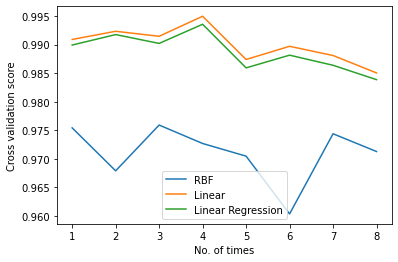

In [15]:
#Comparison plot

s1 = plt.plot(np.arange(1,9), rbf[:8])
s2 = plt.plot(np.arange(1,9), linear[:8])
s3 = plt.plot(np.arange(1,9), lr[:8])
plt.xlabel('No. of times')
plt.ylabel('Cross validation score')
plt.legend(('RBF', 'Linear', 'Linear Regression'))
plt.show()

In [16]:
# Then train the model with above paramter
f = SVR(kernel='linear', C=50, epsilon=0.01)
f.fit(x_train, y_train)

SVR(C=50, epsilon=0.01, kernel='linear')

In [17]:
# Find the training error
train_err = np.abs(y_train-f.predict(x_train))*100/y_train
print(f'Mean error is {np.mean(train_err)} within range ({np.min(train_err)}, {np.max(train_err)})')

Mean error is 0.6851400292148443 within range (0.008786309462374145, 7.495318715413474)


In [18]:
# Do prediction and find the testing error
test_err = np.abs(y_test-f.predict(x_test))*100/y_test
print(f'Mean error is {np.mean(test_err)} within range ({np.min(test_err)}, {np.max(test_err)})')

Mean error is 0.5245524992988088 within range (0.015807022598118635, 1.780568107451927)


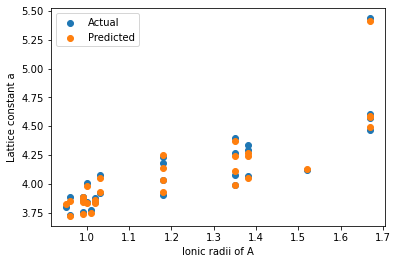

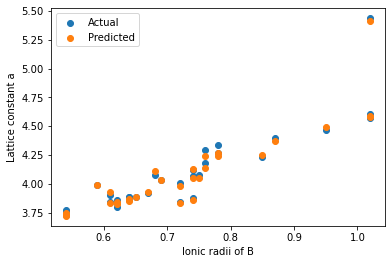

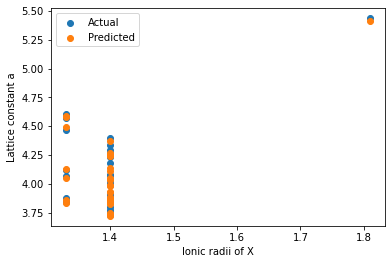

In [21]:
# Plot some graphs to visualize our prediction
s1 = plt.scatter(x_test[:,0], y_test)
s2 = plt.scatter(x_test[:,0], f.predict(x_test))
plt.legend((s1, s2),('Actual','Predicted'))
plt.xlabel('Ionic radii of A')
plt.ylabel('Lattice constant a')
plt.show()
s3 = plt.scatter(x_test[:,1], y_test)
s4 = plt.scatter(x_test[:,1], f.predict(x_test))
plt.legend((s3, s4),('Actual','Predicted'))
plt.xlabel('Ionic radii of B')
plt.ylabel('Lattice constant a')
plt.show()
s5 = plt.scatter(x_test[:,2], y_test)
s6 = plt.scatter(x_test[:,2], f.predict(x_test))
plt.legend((s3, s4),('Actual','Predicted'))
plt.xlabel('Ionic radii of X')
plt.ylabel('Lattice constant a')
plt.show()